In this notebook, we simulate and analyze the variations in key wastewater parameters over a period of 112 days, using a time resolution of four observations per day. This simulation takes into account different operating conditions—DRY, RAIN, and STORM—to capture realistic fluctuations in wastewater characteristics. Each operating regime has a distinct impact on the parameters, based on the variability in water inflow and pollutant concentration observed in wastewater treatment plants.

parameters simulated include:

COD (Chemical Oxygen Demand): Indicates the organic matter present in water.
BOD5 (Biological Oxygen Demand): Measures the oxygen required by microorganisms to break down organic matter over five days.
TSS (Total Suspended Solids): Reflects the suspended particles in wastewater.
SNH4-N (Ammonium Nitrogen): Represents the nitrogen content from ammonium.
SNO-N (Nitrate Nitrogen): Indicates the nitrogen present in the form of nitrate.
Ntot (Total Nitrogen): The combined nitrogen content from various sources.
Each parameter has a baseline value, with fluctuations applied to simulate different operating conditions:

DRY Regime: Small fluctuations around the base value.
RAIN Regime: Moderate increase in values due to higher inflow.
STORM Regime: Larger fluctuations, reflecting peak pollutant levels.
Data Analysis
We plotted each parameter across the simulated period to observe how values change over time in response to the operating regime. The transitions between DRY, RAIN, and STORM conditions are evident from the chart, showing increasing trends in pollutant levels during more intense inflow events.

Observations
Parameter Trends: The parameters tend to increase in concentration from DRY to STORM regimes, reflecting the expected stress on wastewater treatment plants during high inflow conditions.
Regime Transitions: The plot shows smooth transitions in parameter values between different operating regimes, with the most significant spikes occurring during STORM periods.
This simulation provides insights into the typical performance of wastewater treatment processes under variable conditions and could serve as a basis for testing control algorithms or optimization techniques in wastewater treatment.

<ipython-input-5-a7fc3d5a25cb>:35: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  time_series = pd.date_range(start="2023-01-01", periods=total_steps, freq="6H")


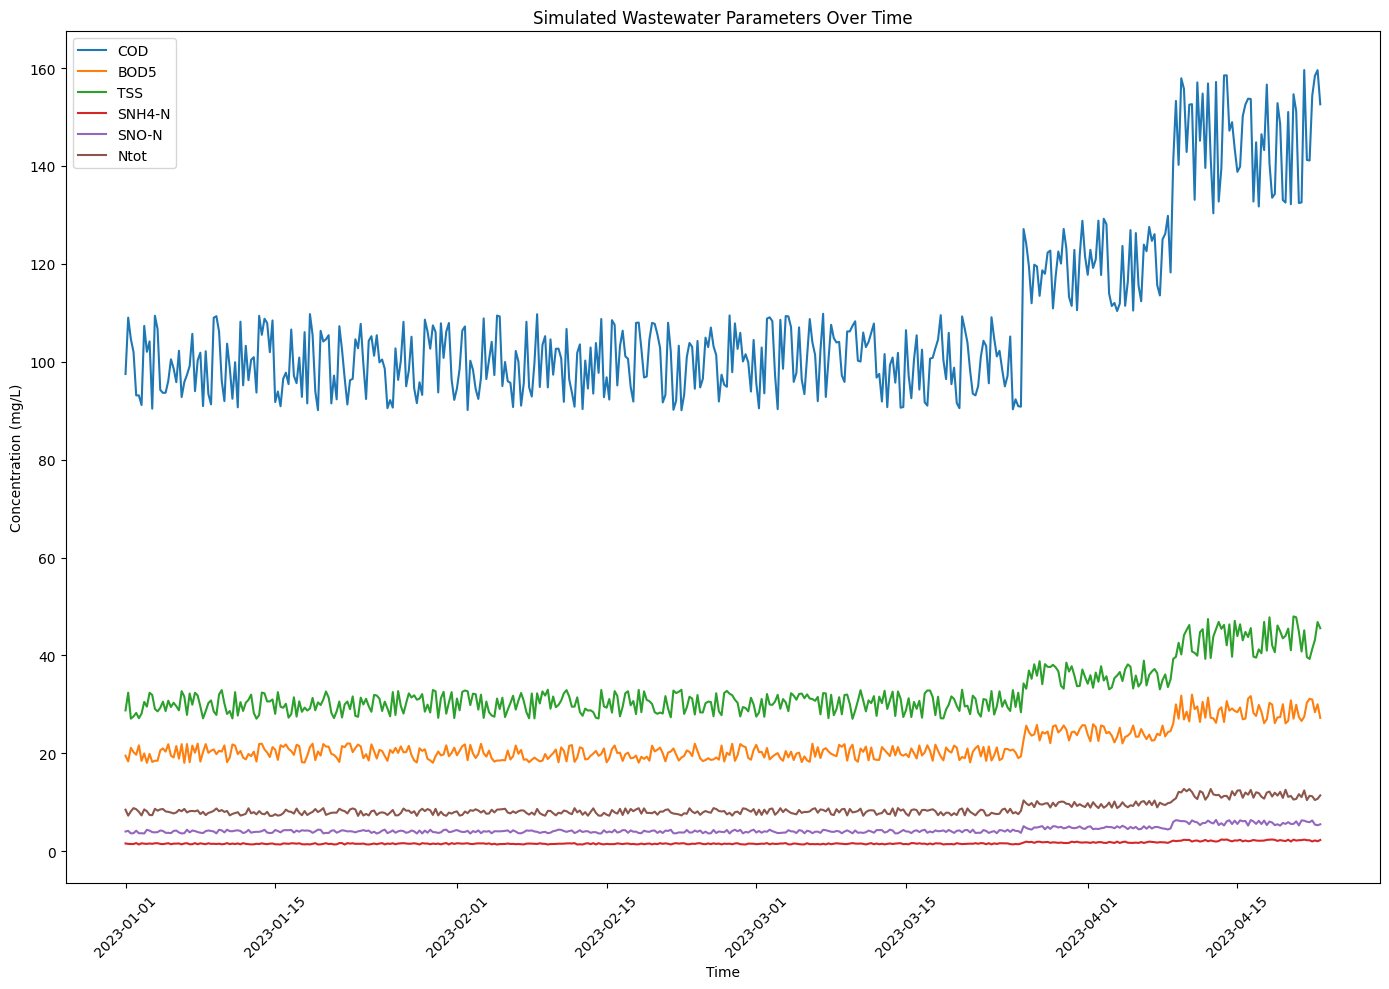

In [5]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Setting the simulation parameters
np.random.seed(42)
days = 112
time_steps_per_day = 4  # Simulating four time points per day
total_steps = days * time_steps_per_day

# Parameters to simulate: COD, BOD5, TSS, SNH4-N, SNO-N, and Ntot
# Initialize time series for each parameter with base values and add random fluctuations
base_values = {
    "COD": 100,    # Base chemical oxygen demand in mg/L
    "BOD5": 20,    # Base biological oxygen demand in mg/L
    "TSS": 30,     # Total suspended solids in mg/L
    "SNH4-N": 1.5, # Ammonium concentration in mg/L
    "SNO-N": 4,    # Nitrate concentration in mg/L
    "Ntot": 8      # Total nitrogen in mg/L
}

# Set up fluctuations to simulate DRY, RAIN, and STORM conditions
fluctuations = {
    "DRY": (0.9, 1.1),
    "RAIN": (1.1, 1.3),
    "STORM": (1.3, 1.6)
}

# Define operating regime over time (e.g., DRY for the first 84 days, RAIN and STORM for the last 28 days)
operating_regime = ["DRY"] * (84 * time_steps_per_day) + \
                   ["RAIN"] * (14 * time_steps_per_day) + \
                   ["STORM"] * (14 * time_steps_per_day)

# Create a DataFrame to hold simulated data
time_series = pd.date_range(start="2023-01-01", periods=total_steps, freq="6H")
data = pd.DataFrame(index=time_series)

# Simulate data for each parameter
for param, base in base_values.items():
    simulated_values = []
    for i in range(total_steps):
        regime = operating_regime[i]
        fluctuation = np.random.uniform(*fluctuations[regime])
        simulated_value = base * fluctuation
        simulated_values.append(simulated_value)
    data[param] = simulated_values

# Plotting the simulated wastewater parameters
plt.figure(figsize=(14, 10))
for i, param in enumerate(base_values.keys()):
    plt.plot(data.index, data[param], label=param)
plt.xlabel("Time")
plt.ylabel("Concentration (mg/L)")
plt.title("Simulated Wastewater Parameters Over Time")
plt.legend()
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()



The simulation and plotting code initializes with baseline values for each parameter and introduces random fluctuations based on the operating regime. These fluctuations allow us to create a realistic dataset that reflects day-to-day and regime-based changes in water quality parameters.

Simulation Overview
For this scenario, we use significantly larger fluctuations for each parameter compared to the controlled simulation. These fluctuations mimic various scenarios where the wastewater treatment process loses control, resulting in:

Higher chemical and biological oxygen demands as untreated or poorly treated organic material accumulates.
Increased suspended solids due to inadequate settling or filtering.
Elevated nitrogen levels, reflecting excess ammonium and nitrate in the effluent.
The parameter fluctuations for this scenario are as follows:

DRY Regime: Fluctuations between 1.1 and 1.5 times the baseline values.
RAIN Regime: Fluctuations between 1.5 and 2.0 times the baseline values.
STORM Regime: Fluctuations between 2.0 and 2.5 times the baseline values.
Observations
The plot of each parameter over time reveals significant deviations from controlled values, with the most pronounced increases occurring in the STORM regime. Key observations include:

COD and BOD5 Levels: These parameters show substantial spikes, indicating high organic pollution levels.
Ammonium and Nitrate Nitrogen: Elevated nitrogen levels signal insufficient nitrogen removal, a common issue when treatment systems are overloaded.
Total Suspended Solids (TSS): The increase in TSS points to potential failures in sedimentation and filtering stages.

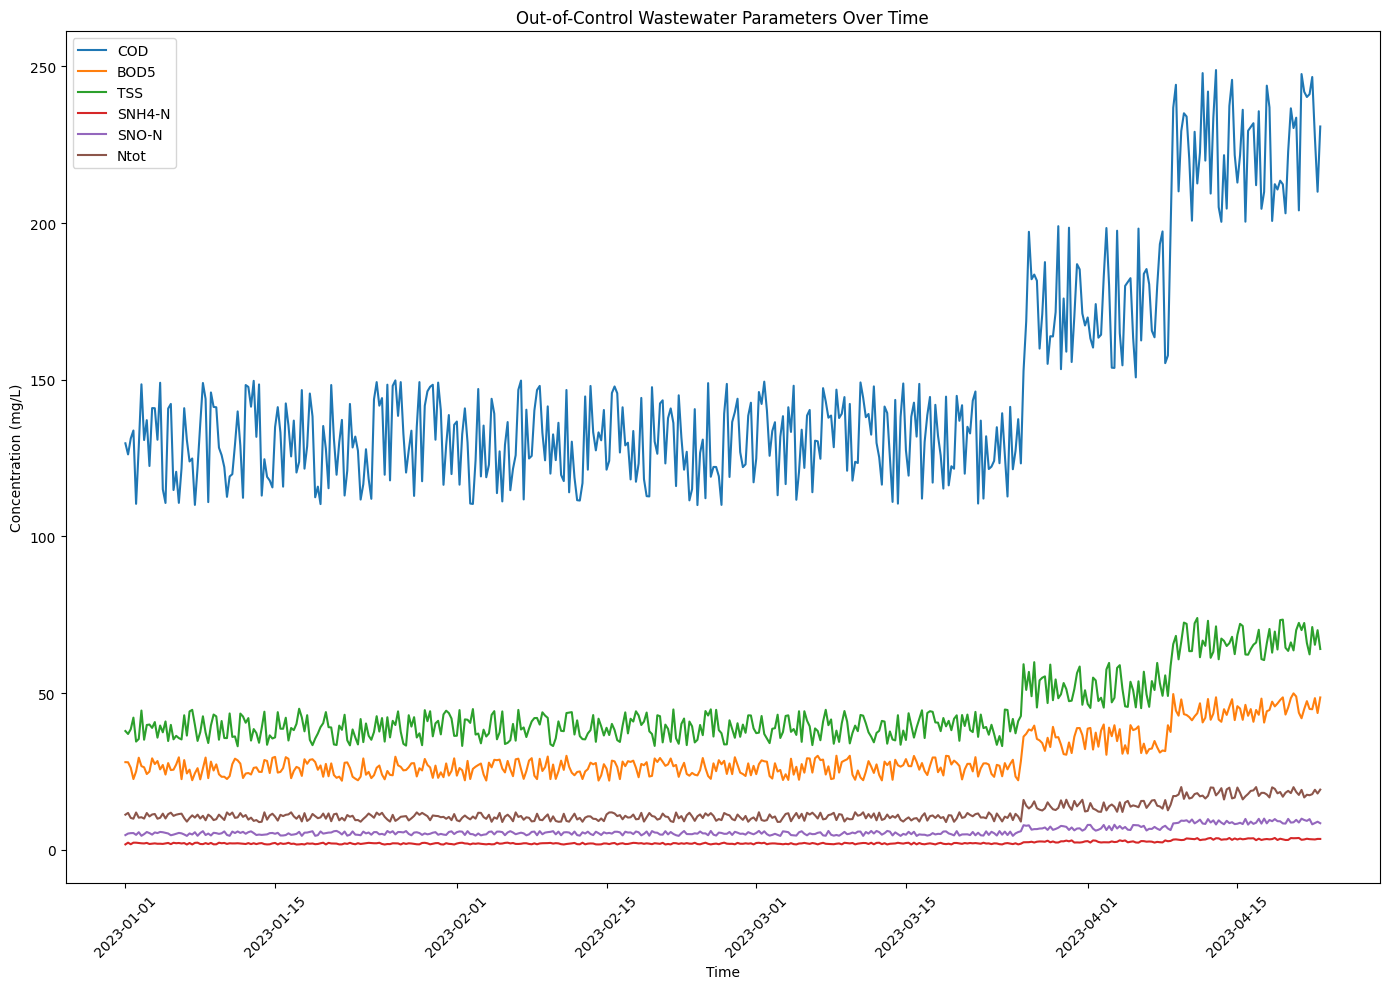

In [6]:
out_of_control_fluctuations = {
    "DRY": (1.1, 1.5),
    "RAIN": (1.5, 2.0),
    "STORM": (2.0, 2.5)
}

# Creating an "out of control" dataset
out_of_control_data = pd.DataFrame(index=time_series)

# Simulate data for each parameter in an out-of-control scenario
for param, base in base_values.items():
    simulated_values = []
    for i in range(total_steps):
        regime = operating_regime[i]
        fluctuation = np.random.uniform(*out_of_control_fluctuations[regime])
        simulated_value = base * fluctuation
        simulated_values.append(simulated_value)
    out_of_control_data[param] = simulated_values

# Plotting the out-of-control wastewater parameters
plt.figure(figsize=(14, 10))
for i, param in enumerate(base_values.keys()):
    plt.plot(out_of_control_data.index, out_of_control_data[param], label=param)
plt.xlabel("Time")
plt.ylabel("Concentration (mg/L)")
plt.title("Out-of-Control Wastewater Parameters Over Time")
plt.legend()
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

Setting control points in a wastewater treatment process requires a systematic approach to maintain operational stability, even under fluctuating conditions. Here is a brief algorithmic approach to determine optimal control points:

1. Identify Key Parameters
Determine the main parameters to control, such as COD, BOD5, TSS, Ammonium Nitrogen (SNH4-N), and Nitrate Nitrogen (SNO-N).
Set acceptable operational ranges for each parameter based on environmental regulations and treatment goals.
2. Define Control Objectives
Establish goals for each parameter, such as maintaining COD within a specific range or minimizing nitrogen levels in effluent.
Use a weighted performance criterion that incorporates multiple objectives (e.g., effluent quality, cost, and failure risk).
3. Select Control Strategies
Choose control methods based on the process dynamics. Options include:
PI/PID Control for stable parameters.
Model Predictive Control (MPC) for complex, multivariable control.
Fuzzy Control for scenarios with nonlinear behavior and uncertainties.
4. Set Initial Control Points
Start with baseline control points based on historical data or simulations under standard conditions.
For example, set the dissolved oxygen concentration in aeration tanks based on optimal bacterial activity.
5. Simulate and Adjust Using Optimization
Use optimization algorithms (e.g., Genetic Algorithm, Simulated Annealing) to find control points that minimize a combined performance criterion (e.g., a function of effluent quality, energy costs, and system stability).
Test control points in simulation to ensure they meet all objectives under varying conditions (e.g., DRY, RAIN, STORM).
6. Implement Feedback Loops
Deploy real-time sensors to monitor each parameter and adjust control points based on live data.
Apply feedback control to dynamically adjust aeration, recirculation rates, and sludge flow based on deviations from target values.
7. Adjust Based on Operating Regimes
Use regime-specific control points (e.g., DRY, RAIN, STORM) that adjust to inflow variability.
Implement a fuzzification block to create smooth transitions between regimes and avoid abrupt changes in control points.
8. Regularly Validate and Recalibrate
Continuously monitor and adjust control points based on periodic system performance evaluation.
Use predictive analytics and machine learning models to forecast control point adjustments under anticipated future conditions.

 We implement Genetic Algorithm (GA) for optimizing control points in a wastewater treatment system. The goal is to minimize a performance criterion
𝐽
J, which combines various system metrics like effluent quality and operational cost.

In this block, we define the GA parameters:

Population Size: The number of solutions in each generation.
Generations: The total number of iterations for the optimization process.
Crossover and Mutation Rates: Control the likelihood of crossover and mutation.
Bounds: Set limits for each gene in the chromosome (e.g., control points in the system).
Each chromosome (individual) has seven genes representing different control points, with their bounds based on operational constraints.

In [ ]:
class GeneticAlgorithm:
    def __init__(self, target_function, population_size=100, generations=100,
                 crossover_rate=0.8, mutation_rate=0.1, bounds=None):
        self.n_genes = 7  # Number of setpoints to optimize
        self.target_function = target_function
        self.population_size = population_size
        self.generations = generations
        self.crossover_rate = crossover_rate
        self.mutation_rate = mutation_rate
        if bounds is None:
            # Bounds as per Table 3 in the paper
            self.bounds = [
                (0.4, 4.0),     # S_OD4
                (0.4, 4.0),     # S_OD5
                (0.4, 4.0),     # S_OD6
                (0.1, 1.0),     # S_NO4
                (0.5, 1.0),     # k_RE
                (1500, 3000),   # Q_PC
                (100, 800)      # Q_EXC
            ]
        else:
            self.bounds = bounds
        self.population = None
        self.fitness = None
        self.parents = None
        self.offspring = None

This method initializes the population randomly within the specified bounds for each gene, representing different possible configurations of the control points.

In [ ]:
import numpy as np

class GeneticAlgorithm:
    def __init__(self, target_function, population_size=100, generations=100,
                 crossover_rate=0.8, mutation_rate=0.1, bounds=None):
        self.n_genes = 7  # Number of setpoints to optimize
        self.target_function = target_function
        self.population_size = population_size
        self.generations = generations
        self.crossover_rate = crossover_rate
        self.mutation_rate = mutation_rate
        if bounds is None:
            # Bounds as per Table 3 in the paper
            self.bounds = [
                (0.4, 4.0),     # S_OD4
                (0.4, 4.0),     # S_OD5
                (0.4, 4.0),     # S_OD6
                (0.1, 1.0),     # S_NO4
                (0.5, 1.0),     # k_RE
                (1500, 3000),   # Q_PC
                (100, 800)      # Q_EXC
            ]
        else:
            self.bounds = bounds
        self.population = None
        self.fitness = None
        self.parents = None
        self.offspring = None

    def initialize_population(self):
        # Initialize population within the bounds
        self.population = np.random.uniform(
            low=[b[0] for b in self.bounds],
            high=[b[1] for b in self.bounds],
            size=(self.population_size, self.n_genes)
        )


This method calculates the fitness of each individual in the population by applying the target_function, which evaluates the performance criterion
𝐽
J for each solution.

In [ ]:
def select_parents(self):
    # Inverse fitness for minimization
    inverse_fitness = 1 / (1 + self.fitness)
    total_fitness = np.sum(inverse_fitness)
    selection_prob = inverse_fitness / total_fitness
    indices = np.random.choice(np.arange(self.population_size), size=self.population_size, p=selection_prob)
    self.parents = self.population[indices]

The crossover operation combines genetic material from pairs of parents to produce offspring. Each gene is swapped between parents based on a binary mask (vector
𝑆
S), adding diversity to the population.

Mutation introduces small random changes to genes, helping prevent premature convergence. The mutation’s standard deviation decreases over time, allowing more precise adjustments as the algorithm progresses.

In [ ]:
def mutate(self, current_generation):
    # Decrease standard deviation over generations
    initial_std = np.array([b[1] - b[0] for b in self.bounds])
    std_dev = initial_std * (1 - current_generation / self.generations)
    for i in range(self.population_size):
        for j in range(self.n_genes):
            if np.random.rand() < self.mutation_rate:
                mutation_value = np.random.normal(0, std_dev[j])
                self.offspring[i, j] += mutation_value
                # Ensure the mutated value is within bounds
                self.offspring[i, j] = np.clip(self.offspring[i, j], self.bounds[j][0], self.bounds[j][1])

The run method executes the main loop of the GA. For each generation, it:

Evaluates fitness and logs the best fitness.
Selects parents, performs crossover, and applies mutation.
Combines the parent and offspring populations, selecting the best individuals for the next generation.
After completing all generations, the method returns the best solution found.

In [7]:
import numpy as np

class GeneticAlgorithm:
    def __init__(self, target_function, population_size=100, generations=100,
                 crossover_rate=0.8, mutation_rate=0.1, bounds=None):
        self.n_genes = 7  # Number of setpoints to optimize
        self.target_function = target_function
        self.population_size = population_size
        self.generations = generations
        self.crossover_rate = crossover_rate
        self.mutation_rate = mutation_rate
        if bounds is None:
            # Bounds as per Table 3 in the paper
            self.bounds = [
                (0.4, 4.0),     # S_OD4
                (0.4, 4.0),     # S_OD5
                (0.4, 4.0),     # S_OD6
                (0.1, 1.0),     # S_NO4
                (0.5, 1.0),     # k_RE
                (1500, 3000),   # Q_PC
                (100, 800)      # Q_EXC
            ]
        else:
            self.bounds = bounds
        self.population = None
        self.fitness = None
        self.parents = None
        self.offspring = None

    def initialize_population(self):
        # Initialize population within the bounds
        self.population = np.random.uniform(
            low=[b[0] for b in self.bounds],
            high=[b[1] for b in self.bounds],
            size=(self.population_size, self.n_genes)
        )

    def evaluate_fitness(self):
        # Compute fitness for each individual
        self.fitness = np.array([self.target_function(individual) for individual in self.population])

    def select_parents(self):
        # Inverse fitness for minimization
        inverse_fitness = 1 / (1 + self.fitness)
        total_fitness = np.sum(inverse_fitness)
        selection_prob = inverse_fitness / total_fitness
        indices = np.random.choice(np.arange(self.population_size), size=self.population_size, p=selection_prob)
        self.parents = self.population[indices]

    def crossover(self):
        # Perform crossover using binary vector S
        offspring = []
        for i in range(0, self.population_size, 2):
            parent1 = self.parents[i]
            parent2 = self.parents[(i + 1) % self.population_size]
            child1, child2 = parent1.copy(), parent2.copy()
            if np.random.rand() < self.crossover_rate:
                S = np.random.randint(0, 2, self.n_genes)
                for gene_index in range(self.n_genes):
                    if S[gene_index] == 1:
                        child1[gene_index] = parent2[gene_index]
                        child2[gene_index] = parent1[gene_index]
            offspring.extend([child1, child2])
        self.offspring = np.array(offspring)

    def mutate(self, current_generation):
        # Decrease standard deviation over generations
        initial_std = np.array([b[1] - b[0] for b in self.bounds])
        std_dev = initial_std * (1 - current_generation / self.generations)
        for i in range(self.population_size):
            for j in range(self.n_genes):
                if np.random.rand() < self.mutation_rate:
                    mutation_value = np.random.normal(0, std_dev[j])
                    self.offspring[i, j] += mutation_value
                    # Ensure the mutated value is within bounds
                    self.offspring[i, j] = np.clip(self.offspring[i, j], self.bounds[j][0], self.bounds[j][1])

    def run(self):
        self.initialize_population()
        for gen in range(1, self.generations + 1):
            self.evaluate_fitness()
            best_index = np.argmin(self.fitness)
            best_fitness = self.fitness[best_index]
            best_individual = self.population[best_index]
            print(f"Generation {gen}: Best Fitness = {best_fitness}")
            self.select_parents()
            self.crossover()
            self.mutate(current_generation=gen)
            # Combine parents and offspring
            combined_population = np.vstack((self.population, self.offspring))
            combined_fitness = np.array([self.target_function(ind) for ind in combined_population])
            # Select the best N individuals for the next generation
            sorted_indices = np.argsort(combined_fitness)
            self.population = combined_population[sorted_indices][:self.population_size]
        # After all generations, return the best solution
        self.evaluate_fitness()
        best_index = np.argmin(self.fitness)
        best_fitness = self.fitness[best_index]
        best_individual = self.population[best_index]
        return best_individual, best_fitness

# Placeholder for the simulation and performance criterion computation
def target_function(setpoints):
    """
    Compute the performance criterion J for the given setpoints.
    This function should simulate the wastewater treatment process
    and compute J as per Equation (4) in the paper.
    For demonstration purposes, we'll use a mock function.
    """
    # Extract setpoints
    S_OD4, S_OD5, S_OD6, S_NO4, k_RE, Q_PC, Q_EXC = setpoints

    # Mock computation of J (to be replaced with actual simulation)
    # Example: Simple quadratic function centered around some optimal values
    J1 = (S_OD4 - 2.2)**2 + (S_OD5 - 2.0)**2 + (S_OD6 - 2.0)**2
    J2 = (S_NO4 - 0.5)**2 + (k_RE - 0.75)**2
    J3 = ((Q_PC - 2250) / 2250)**2 + ((Q_EXC - 450) / 450)**2
    alpha1, alpha2, alpha3 = 0.5, 1, 100
    J = alpha1 * J1 + alpha2 * J2 + alpha3 * J3

    return J

if __name__ == "__main__":
    ga = GeneticAlgorithm(target_function=target_function, population_size=50, generations=50)
    best_setpoints, best_fitness = ga.run()
    print("\nOptimal Setpoints Found:")
    setpoint_names = ['S_OD4', 'S_OD5', 'S_OD6', 'S_NO4', 'k_RE', 'Q_PC', 'Q_EXC']
    for name, value in zip(setpoint_names, best_setpoints):
        print(f"{name}: {value}")
    print(f"Minimum Performance Criterion J: {best_fitness}")


Generation 1: Best Fitness = 1.6737386771380862
Generation 2: Best Fitness = 1.6737386771380862
Generation 3: Best Fitness = 0.46477550131602685
Generation 4: Best Fitness = 0.46477550131602685
Generation 5: Best Fitness = 0.46477550131602685
Generation 6: Best Fitness = 0.46477550131602685
Generation 7: Best Fitness = 0.46477550131602685
Generation 8: Best Fitness = 0.35757851221110554
Generation 9: Best Fitness = 0.3450112455175466
Generation 10: Best Fitness = 0.3450112455175466
Generation 11: Best Fitness = 0.26753180056482706
Generation 12: Best Fitness = 0.26753180056482706
Generation 13: Best Fitness = 0.24628991132518874
Generation 14: Best Fitness = 0.24628991132518874
Generation 15: Best Fitness = 0.20199948654023137
Generation 16: Best Fitness = 0.16527702578889114
Generation 17: Best Fitness = 0.16527702578889114
Generation 18: Best Fitness = 0.1063479710200421
Generation 19: Best Fitness = 0.0629866383919755
Generation 20: Best Fitness = 0.0629866383919755
Generation 21: B

### Setpoints in the Wastewater Treatment Optimization Model

#### 1. S_OD4, S_OD5, S_OD6 (Setpoints for Dissolved Oxygen in Tanks B4, B5, and B6)

- **Definition**: These values represent the desired concentrations of dissolved oxygen (DO) in different tanks (B4, B5, and B6) within the biological treatment stage of the wastewater process.
- **Role**: Dissolved oxygen is critical for the aerobic biological processes that help remove organic pollutants. Optimal DO levels allow aerobic bacteria to thrive, breaking down organic matter efficiently.
- **In Optimization**: In the equation for J, the term J1 penalizes deviations of S_OD4, S_OD5, and S_OD6 from target values (e.g., 2.2 mg/L for S_OD4 and 2.0 mg/L for the others). This part of the cost function ensures DO levels stay close to optimal.

#### 2. S_NO4 (Setpoint for Nitrate Concentration)

- **Definition**: This setpoint represents the target concentration of nitrate in a specific stage of the treatment process (often the anoxic zone, where denitrification occurs).
- **Role**: Nitrate (NO₃⁻) concentration control is vital for nitrogen removal through denitrification, a process where bacteria convert nitrate into nitrogen gas. Proper nitrate control reduces the nitrogen levels in effluent, helping the plant meet regulatory standards.
- **In Optimization**: In J2, the deviation of S_NO4 from 0.5 mg/L is penalized. This term ensures that the nitrate level stays close to the desired concentration for optimal nitrogen removal efficiency.

#### 3. k_RE (Recirculation Flow Coefficient)

- **Definition**: This coefficient determines the proportion of the recirculated flow rate, which recycles part of the treated water back into the system for additional treatment.
- **Role**: Recirculation helps maintain the concentration of microbes, improving the efficiency of biological processes. A proper flow rate is crucial to maintain stable conditions in the biological treatment tanks.
- **In Optimization**: J2 also penalizes deviations of k_RE from 0.75, which is an optimal value in this model. This term helps ensure the recirculation rate is within an efficient range, balancing treatment quality and energy costs.

#### 4. Q_PC (Primary Clarifier Sludge Flow Rate)

- **Definition**: This setpoint defines the rate of sludge flow extracted from the primary clarifier, where solids settle out of the wastewater.
- **Role**: Proper sludge removal prevents the buildup of solids in the clarifier, ensuring efficient treatment and preventing overflow. Sludge flow also affects downstream treatment stages, as excess sludge can lead to higher operational costs.
- **In Optimization**: In J3, the deviation of Q_PC from 2250 m³/day is penalized, indicating an optimal range for maintaining clarifier performance and minimizing costs associated with excess sludge.

#### 5. Q_EXC (Excess Sludge Flow Rate)

- **Definition**: This parameter sets the flow rate for excess sludge removed from the system after secondary treatment.
- **Role**: Excess sludge must be removed to prevent clogging and maintain the system's balance. This flow affects sludge processing costs and efficiency.
- **In Optimization**: The term J3 penalizes deviations of Q_EXC from 450 m³/day, maintaining optimal sludge removal rates to avoid over- or under-processing of excess sludge.

### Performance Criterion J

The cost function J aggregates three components:

- **J1**: The sum of squared deviations of the dissolved oxygen setpoints S_OD4, S_OD5, and S_OD6 from their optimal values. This term focuses on maintaining proper oxygen levels.
- **J2**: Penalizes deviations of the nitrate concentration S_NO4 and recirculation coefficient k_RE, balancing nitrogen removal and recirculation.
- **J3**: Penalizes deviations of sludge flow rates Q_PC and Q_EXC, optimizing sludge management.

The weighting coefficients alpha_1, alpha_2, and alpha_3 (0.5, 1, and 100) prioritize these terms based on their relative importance. The high weight on J3 emphasizes the importance of controlling sludge flow rates due to their significant impact on treatment efficiency and cost.
